# Data Analysis 2 - Assignment 1 
Péter Szilvási

Máté Schieszler

## Set up

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("DA2_2023")[0]

# Load prewritten functions
func = dirname + "DA2_2023/work-files/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
# Import all data
data_all = pd.read_csv("morg-2014-emp.csv")

In [5]:
data_all.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [6]:
#filtering for "Physicians and surgeons"
data_all.loc[data_all["occ2012"] == 3060]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
42,89,130003560100156,January,AL,3296.7986,2884.61,60,45,1,NaN,...,2,10,"Native, Born In US",63,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work
315,702,700409931145569,January,AZ,4457.2145,1442.00,60,46,4,NaN,...,3,5,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,Yes,Employed-At Work
316,703,700409931145569,January,AZ,3939.9377,1730.00,60,46,4,NaN,...,3,5,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,Yes,Employed-At Work
352,777,140328063906491,January,AZ,3999.9218,2884.61,50,46,1,NaN,...,3,3,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,No,Employed-At Work
528,1210,23408025621,January,CA,3459.5845,2884.61,80,45,1,NaN,...,0,0,"Foreign Born, Not a US Citizen",93,Hospitals (622),3060,Government - State,No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148617,315527,110004875115103,December,WA,3379.9722,1079.00,40,46,1,1.0,...,2,8,"Foreign Born, US Cit By Naturalization",9,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work
148748,315856,745845016909160,December,WV,1141.3081,961.53,80,46,1,NaN,...,0,0,"Native, Born In US",5,Hospitals (622),3060,"Private, Nonprofit",No,No,Employed-At Work
149084,316603,500010413026567,December,WI,3504.1055,1076.92,60,46,4,NaN,...,0,0,"Foreign Born, US Cit By Naturalization",3,Offices of physicians (6211),3060,Government - Federal,No,No,Employed-At Work
149201,316824,501040315059619,December,WY,239.0438,2884.61,40,45,1,NaN,...,0,0,"Foreign Born, US Cit By Naturalization",8,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work


We have 839 records, which is a large enough sample for this exercise

In [7]:
data_all.loc[data_all["occ2012"] == 3060, "sample"] = 1
data_all.loc[data_all["sample"].isna(), "sample"] = 0
data_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work,0.0
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent,0.0
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work,0.0
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work,0.0
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work,0.0
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,0.0
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work,0.0
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work,0.0


In [8]:
# keeping only surgeons and physicans
data = data_all.loc[(data_all["sample"] == 1), :].reset_index(drop=True)
data

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,89,130003560100156,January,AL,3296.7986,2884.61,60,45,1,NaN,...,10,"Native, Born In US",63,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work,1.0
1,702,700409931145569,January,AZ,4457.2145,1442.00,60,46,4,NaN,...,5,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,Yes,Employed-At Work,1.0
2,703,700409931145569,January,AZ,3939.9377,1730.00,60,46,4,NaN,...,5,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,Yes,Employed-At Work,1.0
3,777,140328063906491,January,AZ,3999.9218,2884.61,50,46,1,NaN,...,3,"Native, Born In US",86,Hospitals (622),3060,"Private, For Profit",No,No,Employed-At Work,1.0
4,1210,23408025621,January,CA,3459.5845,2884.61,80,45,1,NaN,...,0,"Foreign Born, Not a US Citizen",93,Hospitals (622),3060,Government - State,No,No,Employed-At Work,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,315527,110004875115103,December,WA,3379.9722,1079.00,40,46,1,1.0,...,8,"Foreign Born, US Cit By Naturalization",9,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work,1.0
835,315856,745845016909160,December,WV,1141.3081,961.53,80,46,1,NaN,...,0,"Native, Born In US",5,Hospitals (622),3060,"Private, Nonprofit",No,No,Employed-At Work,1.0
836,316603,500010413026567,December,WI,3504.1055,1076.92,60,46,4,NaN,...,0,"Foreign Born, US Cit By Naturalization",3,Offices of physicians (6211),3060,Government - Federal,No,No,Employed-At Work,1.0
837,316824,501040315059619,December,WY,239.0438,2884.61,40,45,1,NaN,...,0,"Foreign Born, US Cit By Naturalization",8,Offices of physicians (6211),3060,"Private, For Profit",No,No,Employed-At Work,1.0


In [9]:
data["sample"].value_counts()

1.0    839
Name: sample, dtype: int64

We have a dataset with 839 observations on doctors and medical professionals

In [24]:
# Create variables 
data["female"] = (data["sex"] == 2).astype(int) #dummy
data["w"] = data["earnwke"] / data["uhours"] # hourly wage
data["lnw"] = np.log(data["w"]) #log hourly wage
data["agesq"] = np.power(data["age"], 2) # age squared

## Distribution of earnings

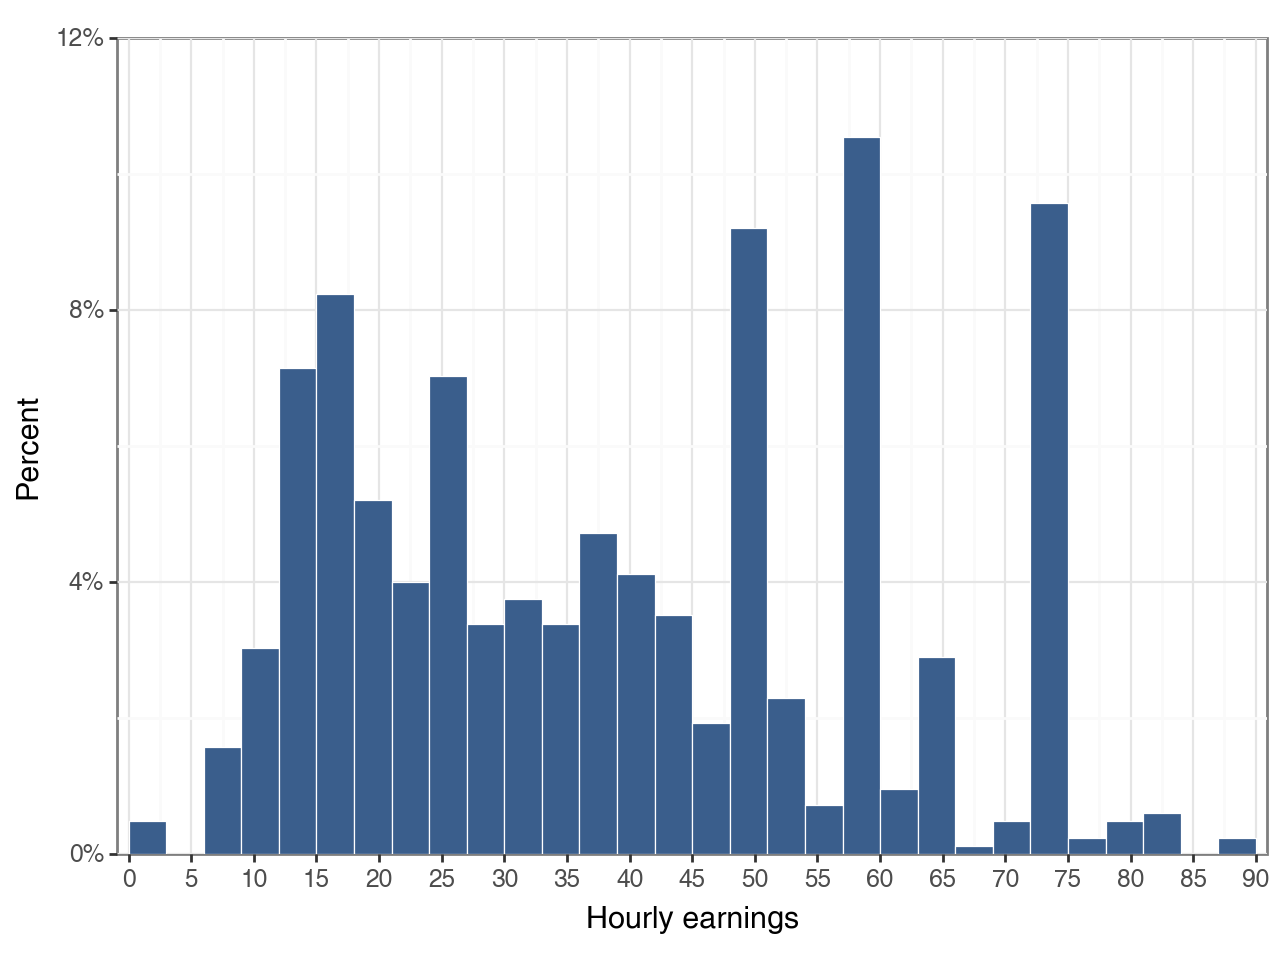

<Figure Size: (640 x 480)>

In [36]:
(
    ggplot(data, aes(x="w", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

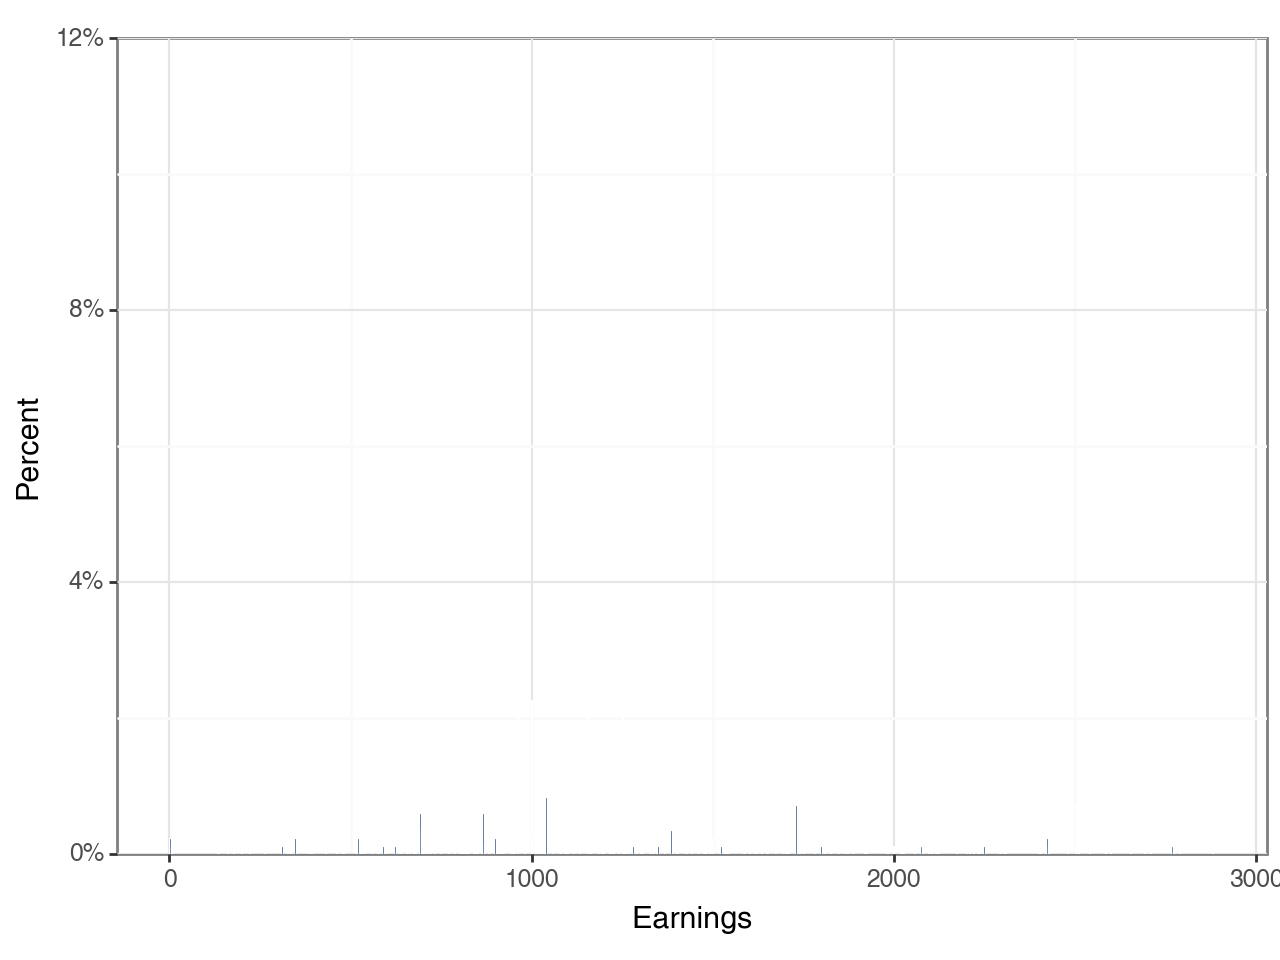

<Figure Size: (640 x 480)>

In [37]:
(
    ggplot(data, aes(x="earnwke", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    # + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

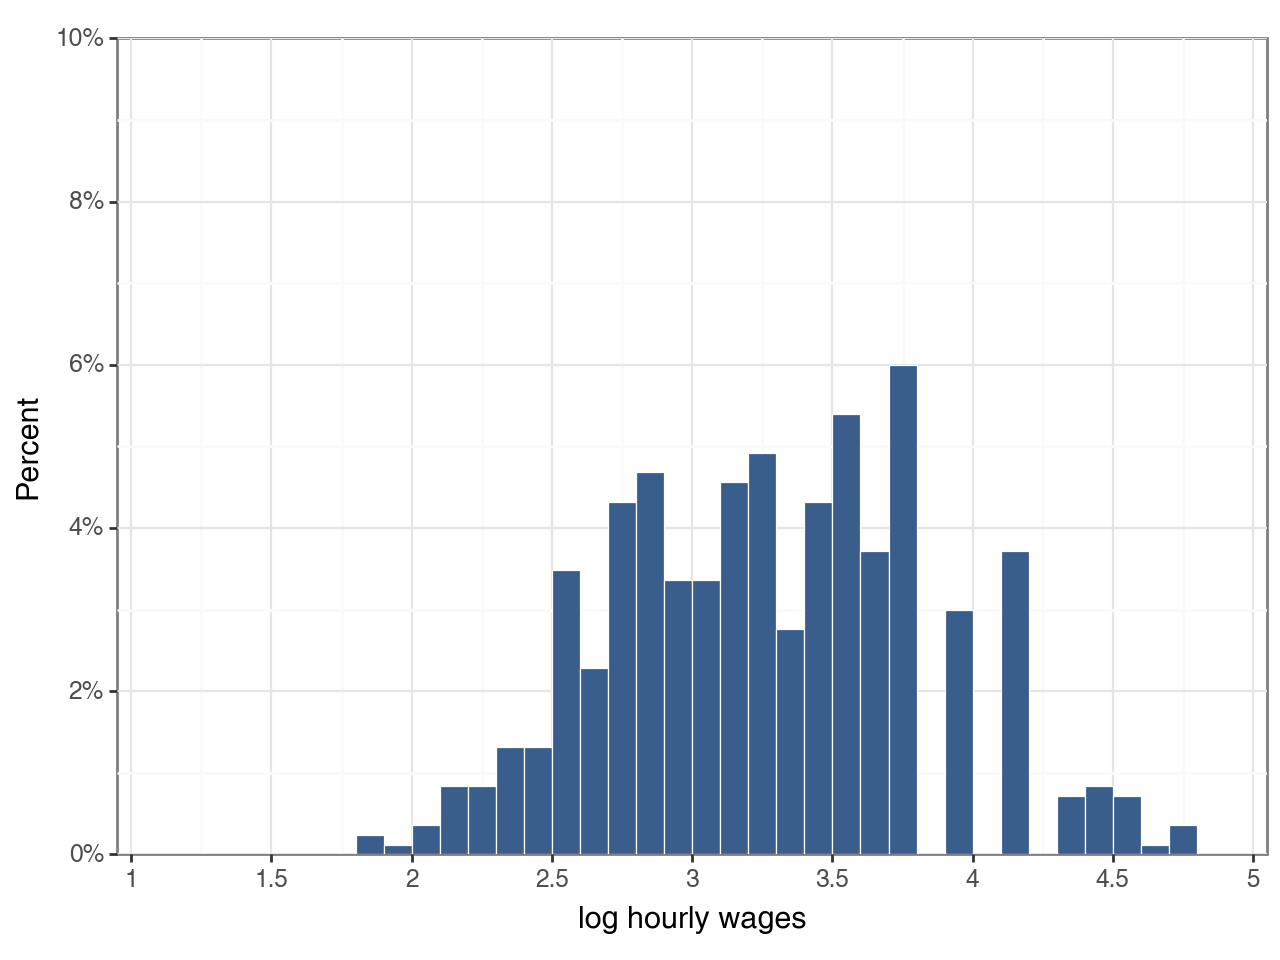

<Figure Size: (640 x 480)>

In [26]:
(
    ggplot(data, aes(x="lnw", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="log hourly wages", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

In [13]:
data.loc[:, ["earnwke", "uhours", "w", "lnw"]].describe()

,earnwke,uhours,w,lnw
count,839.000000,839.000000,839.000000,839.000000
mean,1870.486365,49.805721,40.647989,3.494983
std,894.670219,14.800396,26.468437,0.873526
min,0.010000,4.000000,0.000200,-8.517193
25%,1019.115000,40.000000,20.905556,3.040009
50%,1800.000000,48.000000,38.454545,3.649477
75%,2884.610000,60.000000,57.692200,4.055122
max,2884.610000,99.000000,432.500000,6.069582


In [27]:
data["female"].value_counts()

0    496
1    343
Name: female, dtype: int64

We have data on 343 female and 439 male physicians and surgeons

## Task 1 - Unconditional wage gap

### Model 1

Log earnings - level gender (dummy)

In [15]:
reg1 = smf.ols(formula="lnw~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.708
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.192
Time:                        17:25:19   Log-Likelihood:                -1075.7
No. Observations:                 839   AIC:                             2155.
Df Residuals:                     837   BIC:                             2165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5277      0.039     89.980      0.000       3.451       3.605
female        -0.0801      0.061     -1.307      0.192      -0.200       0.040
==============================================================================
Omnibus:                     1082.755   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245489.765
Skew:                          -6.487   Prob(JB):                         0.00
Kurtosis:                      85.789   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 

Log earnings - level gender (dummy)

Robust robust std

In [16]:
reg2 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.652
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.199
Time:                        17:25:19   Log-Likelihood:                -1075.7
No. Observations:                 839   AIC:                             2155.
Df Residuals:                     837   BIC:                             2165.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5277      0.038     93.576      0.000       3.454       3.602
female        -0.0801      0.062     -1.285      0.199      -0.202       0.042
==============================================================================
Omnibus:                     1082.755   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           245489.765
Skew:                          -6.487   Prob(JB):                         0.00
Kurtosis:                      85.789   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Task 2 - Variance on level of education

In [28]:
# taking a closer look at distrubution of level of education
data["grade92"].value_counts()

45    448
46    282
44     57
43     29
42      8
40      6
41      4
39      4
33      1
Name: grade92, dtype: int64

In [29]:
# Creating dummy variables for three most common categorioes
data["ed_Pro"] = (data["grade92"] == 45).astype(int)
data["ed_Phd"] = (data["grade92"] == 46).astype(int)
data["ed_MA"] = (data["grade92"] == 44).astype(int)

In [30]:
reg8 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1")
reg9 = smf.ols(formula="lnw~female + ed_Pro + ed_Phd", data=data).fit(cov_type="HC1")
reg10 = smf.ols(formula="lnw~female + ed_Pro + ed_MA", data=data).fit(cov_type="HC1")

In [31]:
stargazer = Stargazer([reg8, reg9, reg10])
stargazer.covariate_order(["female", "ed_Pro", "ed_Phd", "ed_MA", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer